# **ML Project | Comparative Analysis of Machine Learning Models for Activity Recognition  using MHEALTH Dataset**


### Importing the needed Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## **Dataset Exploration (10%)**

---



In [ ]:
!kaggle datasets download -d gaurav2022/mobile-health
!unzip mobile-health.zip

df_original = pd.read_csv('mhealth_raw_data.csv')


Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 96% 34.0M/35.5M [00:01<00:00, 34.3MB/s]
100% 35.5M/35.5M [00:01<00:00, 23.4MB/s]
Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [ ]:
df_original

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [ ]:
df_original.shape

(1215745, 14)

In [ ]:
print(df_original.info())
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB
None


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [ ]:
df_original['Activity'].value_counts()
# we have 13 class with non equal number (therefore : the data is not balanced)

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [ ]:
print(df_original.isnull().sum())
print(df_original.duplicated().sum())

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64
0


In [ ]:
df_original.dropna()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [ ]:
#  since the data is not balanced, I will take a sample and consider making all the classes of target y the same count

classes = df_original['Activity'].value_counts()
min_class = classes.min()
df_samples = pd.DataFrame()

for c in classes.index:
    sample = df_original[df_original['Activity'] == c].sample(min_class, random_state=42)
    df_samples = pd.concat([df_samples, sample])

# df_samples.reset_index(drop=True, inplace=True)


# X_undersampled = df_samples.drop(['Activity', 'subject'], axis=1)
# y_undersampled = df_samples['Activity']


In [ ]:
#  after taking the sample I will shuffle the data to make sure the sample is representative
df = df_samples.sample(frac=1, random_state= None)
# df = shuffled_df.sample(frac=0.1, replace=True, random_state= None)

In [ ]:
df.info()
print("______________________________________________________")
df['Activity'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 134446 entries, 1115495 to 684911
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       134446 non-null  float64
 1   aly       134446 non-null  float64
 2   alz       134446 non-null  float64
 3   glx       134446 non-null  float64
 4   gly       134446 non-null  float64
 5   glz       134446 non-null  float64
 6   arx       134446 non-null  float64
 7   ary       134446 non-null  float64
 8   arz       134446 non-null  float64
 9   grx       134446 non-null  float64
 10  gry       134446 non-null  float64
 11  grz       134446 non-null  float64
 12  Activity  134446 non-null  int64  
 13  subject   134446 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 15.4+ MB
______________________________________________________


Activity
0     10342
1     10342
10    10342
7     10342
6     10342
9     10342
11    10342
12    10342
5     10342
3     10342
4     10342
8     10342
2     10342
Name: count, dtype: int64

In [ ]:
#  I dropped the subject column (volunteers number)
df.drop(['subject'], axis=1, inplace = True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
1115495,3.66120,-8.3120,-5.46230,-0.56586,-0.10882,0.294700,-12.80500,0.31401,-2.59890,-0.405880,0.770020,0.090517,0
1149817,0.26241,-9.7205,1.21450,-0.15955,-0.71670,0.666010,-2.79360,-9.25130,-0.12923,-0.878430,-0.636550,0.196120,1
1051686,19.83900,-19.1030,4.54530,-0.32096,-0.95872,-0.282910,5.05630,-8.24130,-5.13080,-1.007800,0.096509,-0.252160,10
813968,0.90825,-9.7975,1.43590,0.34508,-0.61726,0.557960,1.25750,9.13040,1.03990,0.600000,0.852160,-0.219830,7
483491,0.51146,-9.6066,0.72270,-0.60668,-0.76548,-0.383100,-1.64770,-9.43930,1.06970,-0.576470,-0.899380,-0.053879,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
562677,1.53730,-9.6214,0.23222,-0.62709,-0.77861,0.127700,0.53907,8.69470,4.46600,-0.454900,1.028700,0.015086,7
851706,-5.97540,-19.2820,1.54910,0.21892,-0.96998,-0.068762,2.58810,-18.53400,3.57330,-0.129410,-0.755650,0.814660,12
919759,2.21840,-9.5141,0.07773,0.72171,-0.59850,0.125740,-5.18670,7.34770,3.77360,-0.637250,0.180700,0.933190,0
736665,3.26900,-9.2638,2.32990,-0.75139,-1.48590,0.396860,-7.07450,-6.75600,-0.59822,-0.572550,-1.800800,-0.545260,0


In [ ]:
# df_sample.shape

In [ ]:
df.shape

(134446, 13)

**Visualizing the sample's datapoints**

In [ ]:
df.corr()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
alx,1.000000,0.047277,-0.087337,0.082132,0.122229,-0.031408,-0.049518,0.108235,-0.020710,-0.062458,0.103180,0.008617,0.022993
aly,0.047277,1.000000,0.121419,0.071397,0.410161,0.120371,0.109766,0.159477,0.091116,0.079679,0.249965,0.093772,-0.138429
alz,-0.087337,0.121419,1.000000,-0.002437,0.276721,0.143044,-0.110626,0.324246,0.175230,0.042557,0.108433,0.011152,-0.269358
glx,0.082132,0.071397,-0.002437,1.000000,0.165149,0.035241,-0.024398,0.038861,0.105195,0.430146,0.059788,0.607678,0.029872
gly,0.122229,0.410161,0.276721,0.165149,1.000000,0.082771,-0.144218,0.234397,0.092234,0.097126,0.330565,0.095748,-0.142409
glz,-0.031408,0.120371,0.143044,0.035241,0.082771,1.000000,0.189487,0.016513,0.108300,-0.069619,0.408248,0.398364,-0.292706
arx,-0.049518,0.109766,-0.110626,-0.024398,-0.144218,0.189487,1.000000,0.016614,-0.009106,0.332941,-0.077345,0.052349,-0.080445
ary,0.108235,0.159477,0.324246,0.038861,0.234397,0.016513,0.016614,1.000000,0.150326,-0.072719,0.487799,0.118488,0.084256
arz,-0.020710,0.091116,0.175230,0.105195,0.092234,0.108300,-0.009106,0.150326,1.000000,0.272169,0.130944,0.313090,-0.124065
grx,-0.062458,0.079679,0.042557,0.430146,0.097126,-0.069619,0.332941,-0.072719,0.272169,1.000000,-0.198847,0.185548,-0.098393


<Axes: >

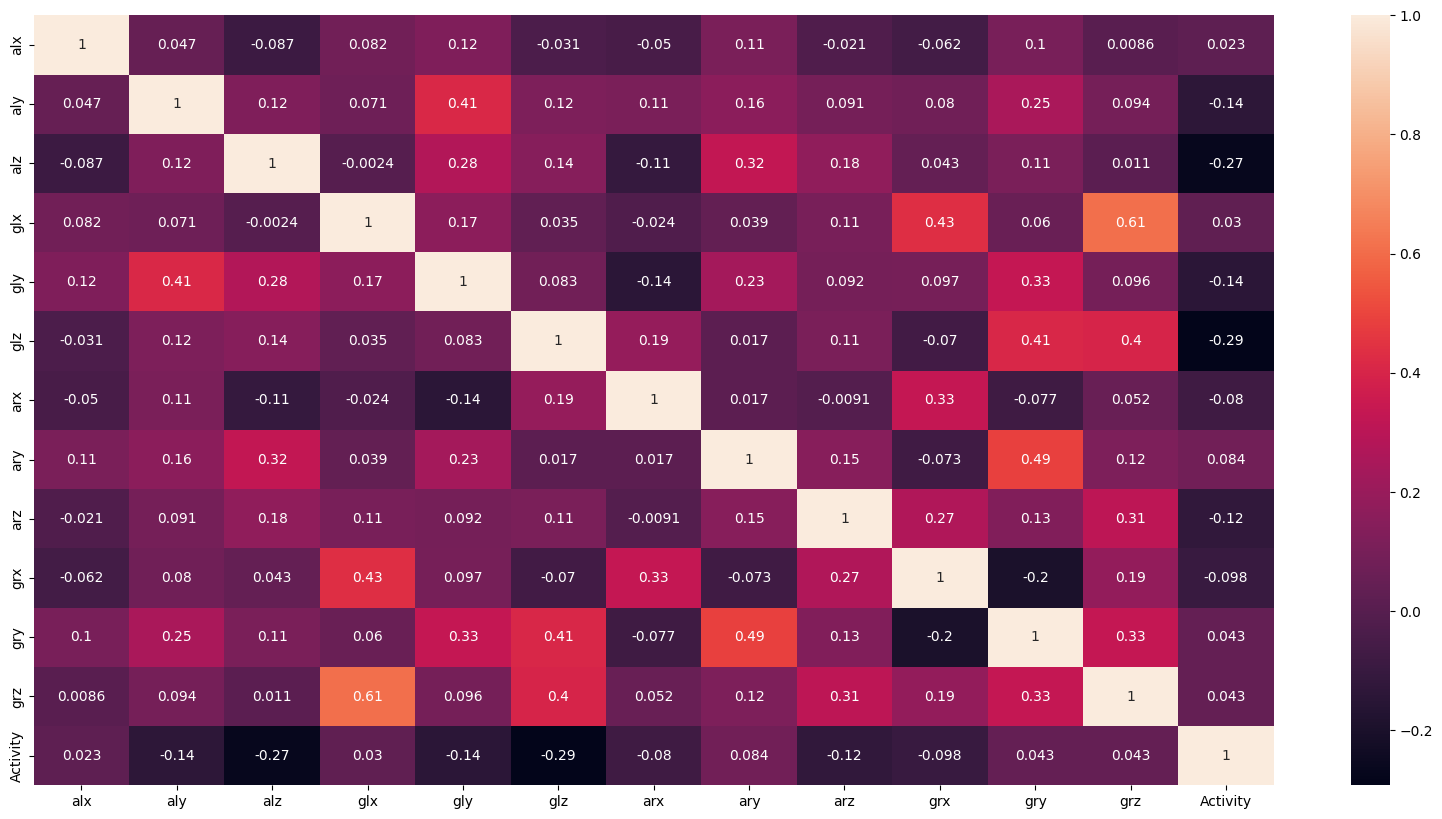

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'glx vs grz')

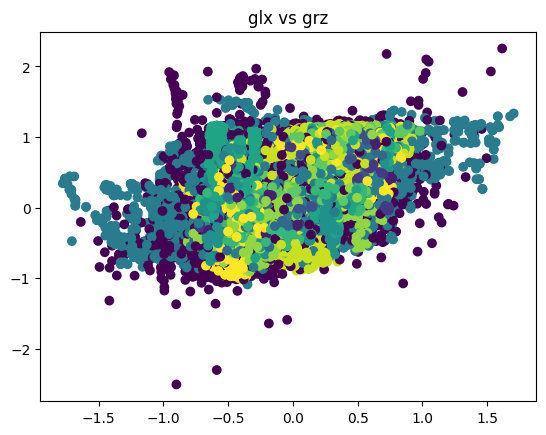

In [ ]:
plt.scatter(df['glx'], df['grz'], c = df['Activity'])
plt.title("glx vs grz")

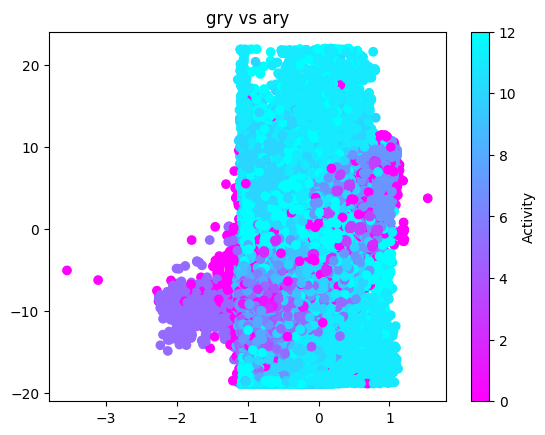

In [ ]:
plt.scatter(df['gry'], df['ary'], c = df['Activity'], cmap= 'cool_r')
plt.title("gry vs ary")
plt.colorbar(label='Activity')

## **Model Training (40%)**

---


In [ ]:
# select all rows and columns except the last one.
x = df.iloc[:,:-1]
# select all rows, but only the last column.
y = df.iloc[:,-1]
print(y)
x


1115495     0
1149817     1
1051686    10
813968      7
483491      6
           ..
562677      7
851706     12
919759      0
736665      0
684911      8
Name: Activity, Length: 134446, dtype: int64


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
1115495,3.66120,-8.3120,-5.46230,-0.56586,-0.10882,0.294700,-12.80500,0.31401,-2.59890,-0.405880,0.770020,0.090517
1149817,0.26241,-9.7205,1.21450,-0.15955,-0.71670,0.666010,-2.79360,-9.25130,-0.12923,-0.878430,-0.636550,0.196120
1051686,19.83900,-19.1030,4.54530,-0.32096,-0.95872,-0.282910,5.05630,-8.24130,-5.13080,-1.007800,0.096509,-0.252160
813968,0.90825,-9.7975,1.43590,0.34508,-0.61726,0.557960,1.25750,9.13040,1.03990,0.600000,0.852160,-0.219830
483491,0.51146,-9.6066,0.72270,-0.60668,-0.76548,-0.383100,-1.64770,-9.43930,1.06970,-0.576470,-0.899380,-0.053879
...,...,...,...,...,...,...,...,...,...,...,...,...
562677,1.53730,-9.6214,0.23222,-0.62709,-0.77861,0.127700,0.53907,8.69470,4.46600,-0.454900,1.028700,0.015086
851706,-5.97540,-19.2820,1.54910,0.21892,-0.96998,-0.068762,2.58810,-18.53400,3.57330,-0.129410,-0.755650,0.814660
919759,2.21840,-9.5141,0.07773,0.72171,-0.59850,0.125740,-5.18670,7.34770,3.77360,-0.637250,0.180700,0.933190
736665,3.26900,-9.2638,2.32990,-0.75139,-1.48590,0.396860,-7.07450,-6.75600,-0.59822,-0.572550,-1.800800,-0.545260


In [ ]:
# Scaling:
scaler = StandardScaler()
X = scaler.fit_transform(x)
# Splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, train_size= 0.8, random_state=None, shuffle=True)

In [ ]:
#check the traing set and test set shapes:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(107556, 12) (26890, 12) (107556,) (26890,)


### **First : KNN**

In [ ]:
hyperParam_K = [3,7,5]
accuracies = []
for i in hyperParam_K:
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  accuracies.append((accuracy_score(y_test, y_pred)))


In [ ]:
accuracies

[0.948196355522499, 0.9417627370769803, 0.9451840833023428]

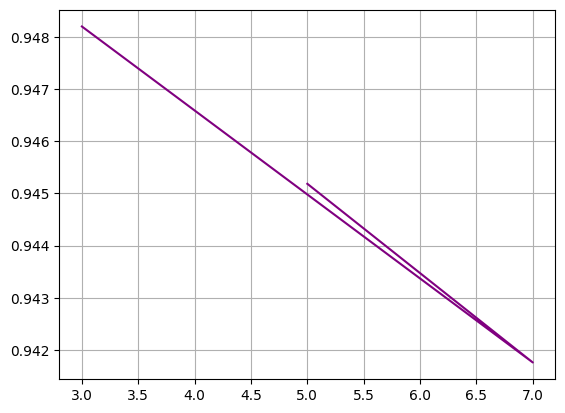

In [ ]:
plt.plot(hyperParam_K, accuracies, color='purple')
plt.grid(True)
plt.show()

In [ ]:
#  3 is the best
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

knn_predictions = knn.predict(x_test)
print(f'The accuracy of the model :{accuracy_score(y_test, knn_predictions)}')

The accuracy of the model :0.948196355522499


### **Second : SVM**

In [ ]:
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC

In [ ]:
svm = SVC(C=100, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100)

In [ ]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

In [ ]:
svm_predictions = svm.predict(x_test)
accuracy = np.mean(svm_predictions == y_test)
print("The accuracy of the model", accuracy*100,"%")

The accuracy of the model 95.40349572331722 %


In [ ]:
# gs = gridspec.GridSpec(2, 2)

# fig = plt.figure(figsize=(16,16))

# clf1 = SVC(C=0.1, kernel='linear')
# clf2 = SVC(C=10, kernel='linear')
# clf3 = SVC(C=20, kernel='poly')
# clf4 = SVC(C=20, kernel='rbf')
# scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

# labels = ['C = 0.1 , Linear Kernel' , 'C = 10, Linear Kernel', 'C = 20 , Polynomial Kernel'  ,'C =20 , RBF Kernel']
# for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
#                          labels,
#                          itertools.product([0, 1], repeat=2)):

#     clf.fit(x_train, y_train)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=x_train, y=y_train_np, clf=clf, legend=2, markers='x^sv<>')
#     plt.title(lab)

# plt.show()

### **Third : Neural Networks**

In [ ]:
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
from keras.optimizers import SGD, Adam

In [ ]:
# I will split the data again but into train , test and validation - after scaling them using the Min Max scaler:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(94112, 12) (20167, 12) (20167, 12) (94112,) (20167,) (20167,)


In [ ]:
NN_model = Sequential([
    Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(12, activation='relu'),
    Dense(13, activation='softmax'),
])
NN_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Epoch: one pass through all of the rows in the training dataset.
# Batch: one or more samples considered by the model within an epoch before weights are updated.
hist1 = NN_model.fit(X_train, Y_train,
          batch_size=32,
          epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
2941/2941 [==============================] - 6s 2ms/step - loss: 2.5068 - accuracy: 0.1351 - val_loss: 2.4121 - val_accuracy: 0.2278
Epoch 2/100
2941/2941 [==============================] - 8s 3ms/step - loss: 2.2404 - accuracy: 0.2696 - val_loss: 2.0225 - val_accuracy: 0.3180
Epoch 3/100
2941/2941 [==============================] - 7s 3ms/step - loss: 1.8605 - accuracy: 0.3677 - val_loss: 1.7138 - val_accuracy: 0.4083
Epoch 4/100
2941/2941 [==============================] - 7s 2ms/step - loss: 1.6411 - accuracy: 0.4223 - val_loss: 1.5552 - val_accuracy: 0.4486
Epoch 5/100
2941/2941 [==============================] - 6s 2ms/step - loss: 1.5213 - accuracy: 0.4588 - val_loss: 1.4555 - val_accuracy: 0.4875
Epoch 6/100
2941/2941 [==============================] - 7s 2ms/step - loss: 1.4309 - accuracy: 0.4922 - val_loss: 1.3703 - val_accuracy: 0.5186
Epoch 7/100
2941/2941 [==============================] - 6s 2ms/step - loss: 1.3535 - accuracy: 0.5217 - val_loss: 1.3027 - val_ac

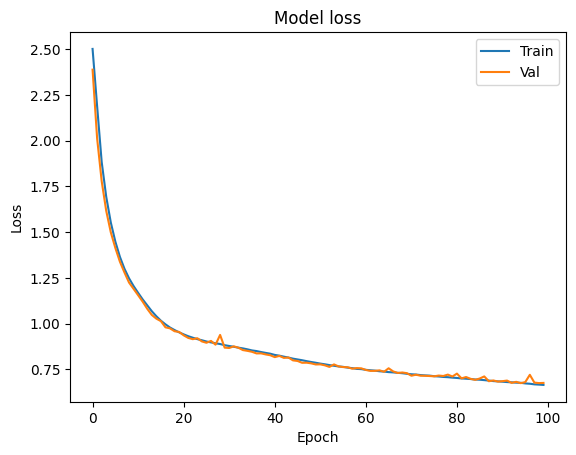

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

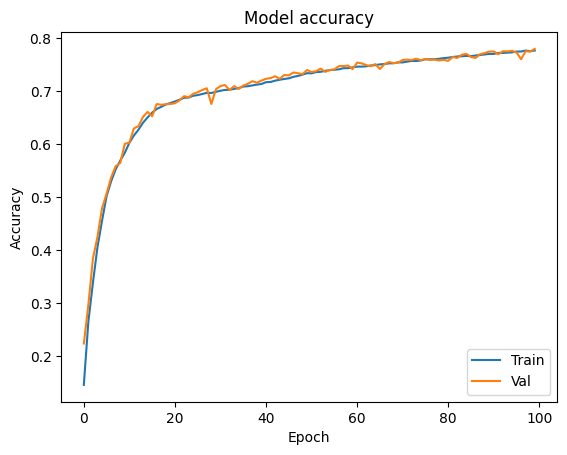

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
nn_loss, nn_accuracy = NN_model.evaluate(X_test, Y_test)
print("NN Accuracy:", nn_accuracy)

631/631 [==============================] - 1s 1ms/step - loss: 0.6686 - accuracy: 0.7806
NN Accuracy: 0.7805821299552917


In [ ]:
#  second trial
NN_model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax'),
])

NN_model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer-encoded labels
              metrics=['accuracy'])

# Epoch: one pass through all of the rows in the training dataset.
# Batch: one or more samples considered by the model within an epoch before weights are updated.
hist = NN_model2.fit(X_train, Y_train,
          batch_size=32,
          epochs=200,
          validation_data=(X_val, Y_val))


Epoch 1/200
2941/2941 [==============================] - 7s 2ms/step - loss: 2.3927 - accuracy: 0.2521 - val_loss: 2.1494 - val_accuracy: 0.3341
Epoch 2/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.8932 - accuracy: 0.4074 - val_loss: 1.6942 - val_accuracy: 0.4661
Epoch 3/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.5536 - accuracy: 0.5064 - val_loss: 1.4517 - val_accuracy: 0.5275
Epoch 4/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.3693 - accuracy: 0.5528 - val_loss: 1.3114 - val_accuracy: 0.5692
Epoch 5/200
2941/2941 [==============================] - 8s 3ms/step - loss: 1.2485 - accuracy: 0.5835 - val_loss: 1.2068 - val_accuracy: 0.5933
Epoch 6/200
2941/2941 [==============================] - 6s 2ms/step - loss: 1.1611 - accuracy: 0.6054 - val_loss: 1.1299 - val_accuracy: 0.6105
Epoch 7/200
2941/2941 [==============================] - 7s 3ms/step - loss: 1.0972 - accuracy: 0.6220 - val_loss: 1.0760 - val_ac

In [ ]:
nn_predictions = NN_model2.predict(X_test)

631/631 [==============================] - 2s 2ms/step


In [ ]:
nn_loss, nn_accuracy = NN_model2.evaluate(X_test, Y_test)
print("NN Accuracy:", nn_accuracy)

631/631 [==============================] - 1s 2ms/step - loss: 0.2594 - accuracy: 0.9211
NN Accuracy: 0.9211087226867676


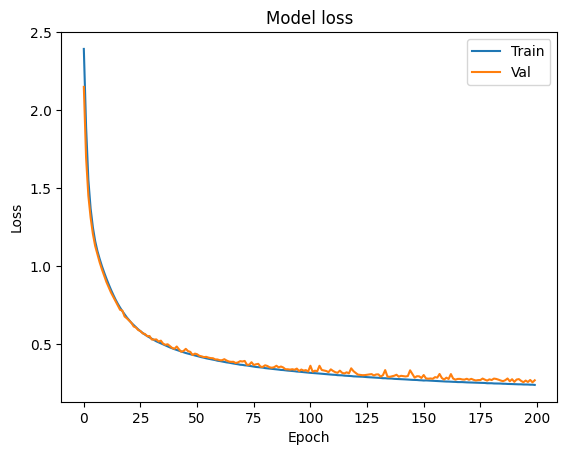

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


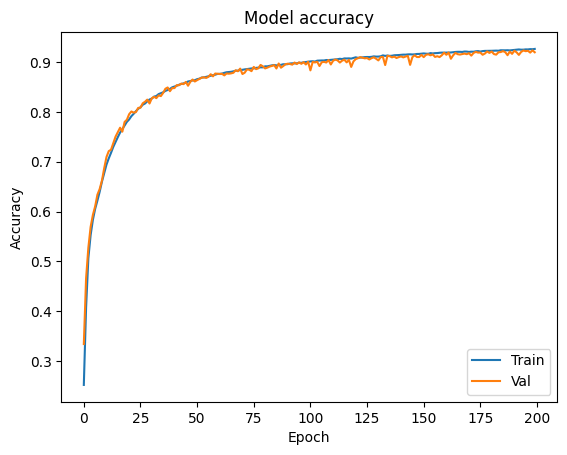

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# note : the graph indicates that the model avoids overfitting (good indicator)

### **Fourth: Logistic Regression**

In [ ]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [ ]:
# set > multi_class='ovr'  for 1 vs all
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
# lm.fit(x_train, y_train)

**Hyperparameter tuning +  Cross Validation**


In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = model_selection.GridSearchCV(lm, params, cv=5)
grid_search.fit(x_train, y_train)

print("Best c:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

logistic_predictions = grid_search.score(x_test, y_test)
print("Test Accuracy:", logistic_predictions)


Best c: {'C': 0.1}
Best cross-validation score: 0.539886251992222
Test Accuracy: 0.5425808850873931


In [ ]:
lm.score(x_train, y_train)

0.5399140912640857

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model_lr= lr.fit(x_train, y_train)
model_lr.predict(x_test)


array([5.0616178 , 5.37909194, 4.19490687, ..., 7.32079395, 1.74742254,
       3.28995332])

In [ ]:
lr.score(x_train,y_train)

0.24128412057502202

In [ ]:
lr.score(x_test,y_test)

0.23941832113587447

## **Models Evaluation (20%)**

**Accuracy**

In [ ]:
# KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# NN
nn_loss, nn_accuracy = NN_model2.evaluate(X_test, Y_test)
print("Neural Network Accuracy:", nn_accuracy)
# Log
print("Logistic Regression Accuracy:", logistic_predictions)


KNN Accuracy: 0.948196355522499
SVM Accuracy: 0.9540349572331722
631/631 [==============================] - 2s 2ms/step - loss: 0.2594 - accuracy: 0.9211
Neural Network Accuracy: 0.9211087226867676
Logistic Regression Accuracy: 0.5425808850873931


**Confusion Matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix

knn_conf_mat = confusion_matrix(y_test, knn_predictions)
svm_conf_mat = confusion_matrix(y_test, svm_predictions)
print(knn_conf_mat)
print("_______________________________________________________________________")
print(svm_conf_mat)

[[1227   40   33   22  159   83   73   94  102   94   26   20   50]
 [   1 2018    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0 2072    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2055    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0 2060    0    2    0    0    0    0    1    0]
 [  19    0    0    0   27 1982    9    2   18    1    1    0    0]
 [   8    0    0    0    0    0 2049   10    1    0    0    0    0]
 [   2    0    0    0    0    0    7 2139    1    0    0    0    0]
 [   4    0    0    0    0    1    8   12 2026    0    0    0    0]
 [   4    0    0    0    0    0    0    0    1 2116    0    0    1]
 [  12    0    0    0    5    1    0    0    0    0 2016   75   11]
 [  14    0    0    0   10    2    0    1    0    0   93 1895   17]
 [  41    0    0    0   18    6    2    0    5    1   96   39 1842]]
_______________________________________________________________________
[[1367   58   33   24   98   81   76   48  

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for KNN:")
print(classification_report(y_test, knn_predictions))

print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

print("Classification Report for NN:")
print(classification_report(Y_test, nn_predictions))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      2023
           1       0.98      1.00      0.99      2019
           2       0.98      1.00      0.99      2073
           3       0.99      1.00      0.99      2055
           4       0.90      1.00      0.95      2069
           5       0.96      0.96      0.96      2059
           6       0.95      0.99      0.97      2068
           7       0.95      1.00      0.97      2149
           8       0.94      0.99      0.96      2051
           9       0.96      1.00      0.98      2122
          10       0.90      0.95      0.93      2120
          11       0.93      0.93      0.93      2032
          12       0.96      0.90      0.93      2050

    accuracy                           0.95     26890
   macro avg       0.95      0.95      0.94     26890
weighted avg       0.95      0.95      0.95     26890

Classification Report for SVM:
              pre

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Results Analysis (20%)**

---



***Visualizations to compare : bar and line charts***

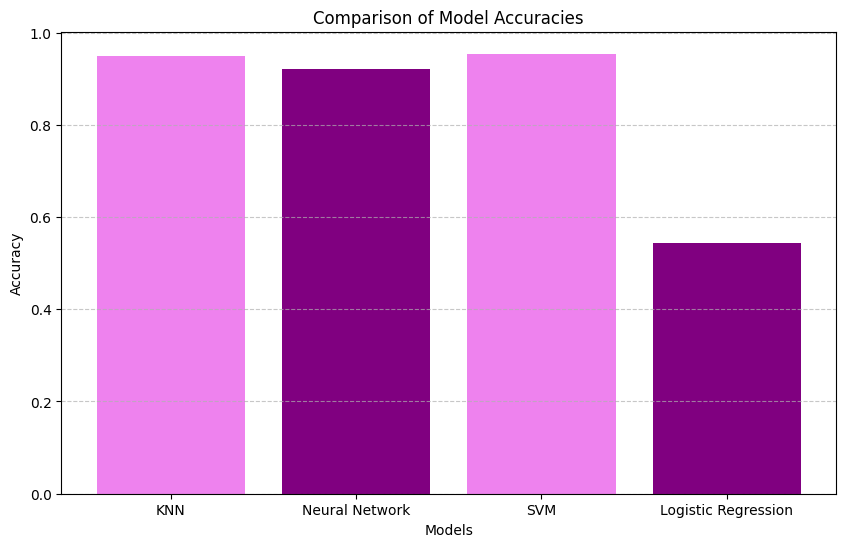

In [ ]:
models = ['KNN', 'Neural Network','SVM', 'Logistic Regression']
accuracies = [knn_accuracy, nn_accuracy, svm_accuracy, logistic_predictions]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['violet', 'purple', 'violet', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


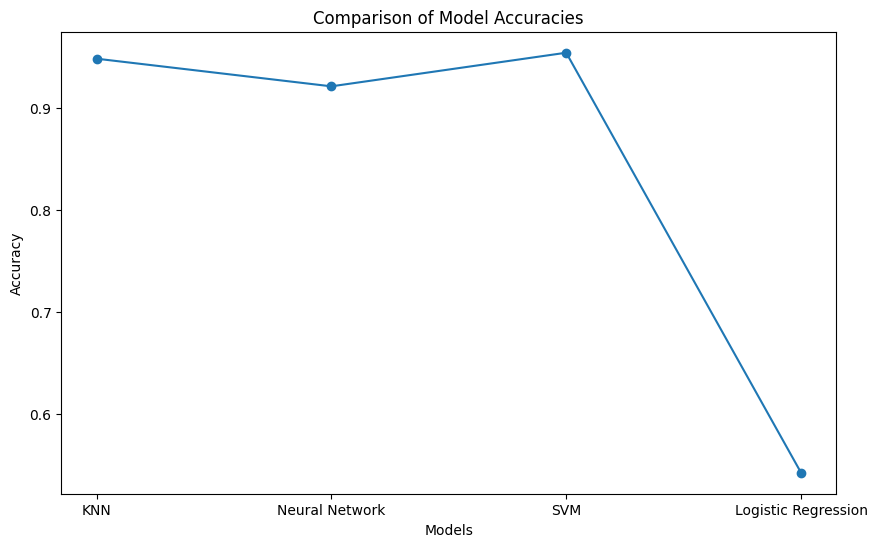

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


## **Conclusion (10%)**

---



> SVM emerged as the best model (95.4% accuracy) for activity recognition using the MHEALTH dataset.
Its ability to handle complex data exceeded KNN and Neural Networks (good accuracy), while Logistic Regression struggled with the multi-class classification task.



